<a href="https://colab.research.google.com/github/moustafa-7/EEG_Seizure_prediction/blob/master/EEG_dataset_preprocessing_Extract_Seizure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install pyedflib

     |████████████████████████████████| 1.1MB 9.7MB/s 
  Created wheel for pyedflib: filename=pyEDFlib-0.1.14-cp36-cp36m-linux_x86_64.whl size=920342 sha256=93573b7ce6a771e699811519b837c5fa09655993561238be256e76ca942f4f14
  Stored in directory: /root/.cache/pip/wheels/6a/62/a0/3d06c48411a5f8e18a7d7376243b81520af87cbd6f24d21cfd
Successfully built pyedflib


In [63]:
from google.colab import drive
import pyedflib

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
df = pd.read_csv("/content/seizures_info - Sheet1.csv")

In [0]:
df = df.iloc[:,0:4]

In [52]:
df

,Patient no.,Seizure number,started at,ended at
0,chb01_03,1.0,2996,3036
1,chb01_04,1.0,1467,1494
2,chb01_15,1.0,1732,1772
3,chb01_16,1.0,1015,1066
4,chb01_18,1.0,1720,1810
5,chb01_21,1.0,327,420
6,chb01_26,1.0,1862,1963
7,chb02_16,1.0,130,212
8,chb02_16,1.0,2972,3053
9,chb02_19,1.0,3369,3378


In [0]:
base_path = "drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/"

In [0]:
files = list(df.iloc[:,0])
start_time = list(df.iloc[:,2])
end_time = list(df.iloc[:,3])

folders = []

for i in range(len(files)):
  
  folders.append(files[i][:-3])
  
  
del folders[8]

del files[8]


del start_time[8]
del start_time[146]
#del start_time[148]

del end_time[8]
del end_time[146]
#del end_time[148]

In [0]:
folders

In [0]:

data = []

In [143]:
import glob
import numpy as np




# filling this numpy array with the signals of the edf file
for i in range(len(folders)):
  f = 0
  i = i + 184
  
  print(i)
  
  f = pyedflib.EdfReader(base_path + folders[i] + '/' +files[i] + ".edf")

  # This gives you how many signals in this edf file in this case there are 23 signals
  n = f.signals_in_file

  # this gives you the label of each signal like this ('FP1-F7', 'F7-T7', 'T7-P7', and so on)
  signal_labels = f.getSignalLabels()
  
  # this is just saying I want a numpy of the same shape of our signal that I will fill with our signal's values
  sigbufs = np.zeros((5, end_time[i]*256 - start_time[i]*256))
  
  sigbufs[0, :] = f.readSignal(7)[start_time[i]*256: end_time[i]*256] 
  sigbufs[1, :] = f.readSignal(9)[start_time[i]*256: end_time[i]*256]
  sigbufs[2, :] = f.readSignal(12)[start_time[i]*256: end_time[i]*256]
  sigbufs[3, :] = f.readSignal(15)[start_time[i]*256: end_time[i]*256]
  sigbufs[4, :] = f.readSignal(20)[start_time[i]*256: end_time[i]*256]
  
  data.append(sigbufs)
  
  

184
185
186
187
188
189
190
191
192
193
194
195
196


IndexError: ignored

In [0]:
len(f.readSignal(7))

In [0]:
print(start_time[i]*256)
print(end_time[i]*256)

In [127]:
len(files)
print(folders[146])
print(files[146])

chb17
chb17_03


In [103]:
2972*256


760832

In [101]:
start_time[8]

2972

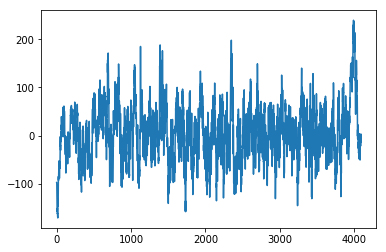

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(data[30][4])

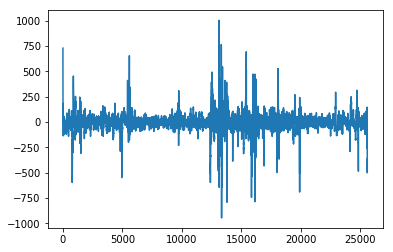

In [112]:
plt.plot(f.readSignal(7)[0:100*256])

In [132]:
!pip install pickle

  ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [0]:
import pickle
with open('/content/drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/seizure_data.pickle', 'wb') as filee:
    pickle.dump(data, filee)

In [134]:
filer = pickle.load('/content/drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/seizure_data.pickle')

TypeError: ignored

In [0]:
with open('/content/drive/My Drive/chb-mit-scalp-eeg-database-1.0.0/seizure_data.pickle', 'rb') as filee:
   data_2 = pickle.load(filee)

In [146]:
data_2

[array([[ 57.63125763,  50.20757021,  43.17460317, ...,  29.89010989,
          22.46642247,  11.52625153],
        [ 29.4993895 ,  25.2014652 ,  18.16849817, ...,  37.31379731,
          20.51282051,  29.89010989],
        [ 62.31990232,  76.38583639,  75.21367521, ...,  -4.49328449,
          13.87057387,  10.35409035],
        [-57.24053724, -51.37973138, -70.13431013, ..., -79.12087912,
         -63.49206349, -50.20757021],
        [ 24.81074481,  36.92307692,  54.8962149 , ...,  18.94993895,
          24.42002442,  13.87057387]]),
 array([[  -2.53968254,  -11.13553114,   -8.79120879, ...,  -23.24786325,
          -11.52625153,    2.53968254],
        [ -90.45177045, -109.20634921,  -90.84249084, ...,   24.81074481,
           23.63858364,   35.75091575],
        [-179.14529915, -120.53724054,  -73.65079365, ...,    8.00976801,
            1.75824176,  -18.16849817],
        [ -42.39316239,  -27.15506716,  -15.43345543, ...,   13.47985348,
            8.79120879,   11.13553114],
  

In [147]:
len(data_2)

192